In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

### Die Daten für den statistischen Test wurden von kaggle gefunden: https://www.kaggle.com/aungpyaeap/supermarket-sales

In [3]:
sales = pd.read_csv("supermarket_sales.csv")

In [4]:
sales.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


## Ich will überprüfen ob in Yangon Mitglieder mehr einkaufen als normale Einkäufer

#### Da ich nur die Stadt Yangon untersuche lösche ich die anderen aus dem Dateframe.

In [5]:
sales = sales.drop(sales[sales.Branch == "C"].index)
sales = sales.drop(sales[sales.Branch == "B"].index)


sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,3/22/2019,19:06,Credit card,282.80,4.761905,14.1400,4.5
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,3/10/2019,20:46,Ewallet,116.06,4.761905,5.8030,8.8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## 1. Modell

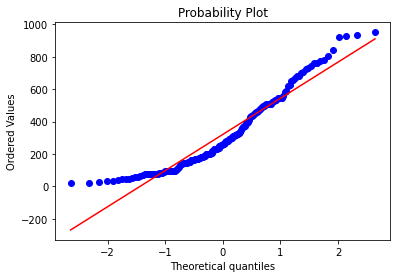

In [6]:
import matplotlib.pyplot as plt
stats.probplot(sales[sales["Customer type"]== "Member"].Total, dist="norm", plot=plt) # Differenzieren zwischen Member und Normal
None

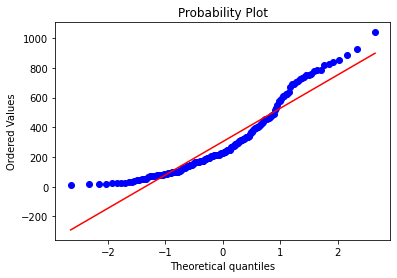

In [7]:
stats.probplot(sales[sales["Customer type"]== "Normal"].Total, dist="norm", plot=plt) # Differenzieren zwischen Member und Normal
None

###  Der Graph sieht mehr nach einer bananförmigen Kurve aus, als eine Gerade. Ich kann somit sagen dass die Daten nicht normalverteilt sind. Auch wenn die Daten nicht normalverteilt sind, haben wir eine genügend Grosse Anzahl von Ihnen um einen ungepaarten stichprobentest durchzuführen.

## 2. Nullhypothese: 


#### H0 : Total_members ≤Total_normal, HA : Total_member >Total_normal

## 3. und 4. Teststatistik und p-Wert

In [7]:
x = sales[sales["Customer type"]== "Member"].Total
y = sales[sales["Customer type"]== "Normal"].Total
t, p =stats.ttest_ind(x, y, nan_policy="omit", equal_var=True, alternative= "two-sided")
p

0.49070672137481863

## 5. Signifikanzniveau: alpha = 5%


In [8]:
a= 0.05

In [9]:
p < a

False

## Fazit: Die Daten sind nicht aussagekräftig genug um die Nullhypothese zu verwerfen! Es gibt keinen Grund anzunhemen dass Mitglieder mehr ausgeben als normale Einkäufer, dies heisst wiederu nicht dass wir sagen können die Nullhyothese stimmt!

### Konfidenzintervalle der Mitglieder und normalen Einkäufer

In [75]:
from statsmodels.stats.weightstats import DescrStatsW
a=DescrStatsW(sales[sales["Customer type"]== "Member"].Total).zconfint_mean(alpha=0.05)

In [76]:
b=DescrStatsW(sales[sales["Customer type"]== "Normal"].Total).zconfint_mean(alpha=0.05)

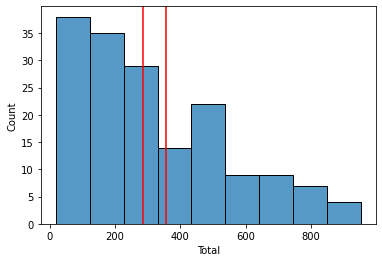

In [79]:
sns.histplot(x= sales[sales["Customer type"]== "Member"].Total)
plt.axvline(x=a[0], color ="r")
plt.axvline(x=a[1], color="r")

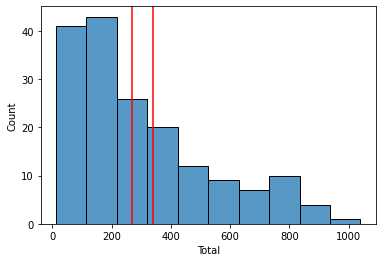

In [80]:
sns.histplot(x= sales[sales["Customer type"]== "Normal"].Total)
plt.axvline(x=b[0], color ="r")
plt.axvline(x=b[1], color="r")